In [2]:
library(ggplot2)
library(ggmap)
library(rgdal)
library(maps)
library(plyr)
library(sp)

In [48]:
capital = read.csv('../data/capital_arr_.csv')
nrow(capital)
head(capital)

[1] 19

nom_qr,sp_cap,cult_cap,soc_cap,decpoor,incrich,Dif,Sum,gent
Outremont,2.46,0.01307282,0.4550000,3,4,1,7,4
L'Île-Bizard-Sainte-Geneviève,2.25,0.12806122,0.5250000,2,3,1,5,3
Pierrefonds-Roxboro,2.37,0.03840328,0.4960000,2,3,1,5,3
Lachine,2.48,0.01174497,0.6761538,0,4,4,4,3
Anjou,1.41,0.01004806,0.5207143,3,2,-1,5,3
LaSalle,1.86,0.02995433,0.4600000,1,2,1,3,2


In [51]:
airbnb = read.csv('../data/airbnb_listings16.csv')
nrow(airbnb)
head(airbnb)

[1] 10619

X,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,nom_qr
1,543823,Nice large bedroom in Outremont,2673521,Rémi,NA,Outremont,45.52014,-73.61295,Entire home/apt,105,1,8,2014-08-22,0.17,2,193,Outremont
2,533084,parisian apartment in Outremont,2619674,Maude,NA,Outremont,45.51822,-73.59651,Entire home/apt,50,4,9,2014-10-05,0.19,1,0,Outremont
3,488959,Nice flat in great neighbourhood,110792,Philipp,NA,Outremont,45.51866,-73.61271,Entire home/apt,80,2,0,,NA,1,0,Outremont
4,5915025,Big Gorgeous Sunny Gem w Roof Deck,5162168,Adam,NA,Outremont,45.52100,-73.61349,Entire home/apt,150,3,5,2015-08-04,0.41,1,0,Outremont
5,753348,Cozy apartment in Montreal,3945222,Adeline,NA,Outremont,45.52014,-73.61552,Entire home/apt,60,2,3,2016-03-12,0.16,1,255,Outremont
6,152630,Nice and sunny condo/Outremont,734359,Nicole,NA,Outremont,45.51719,-73.61799,Entire home/apt,110,5,2,2015-08-24,0.21,1,365,Outremont


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


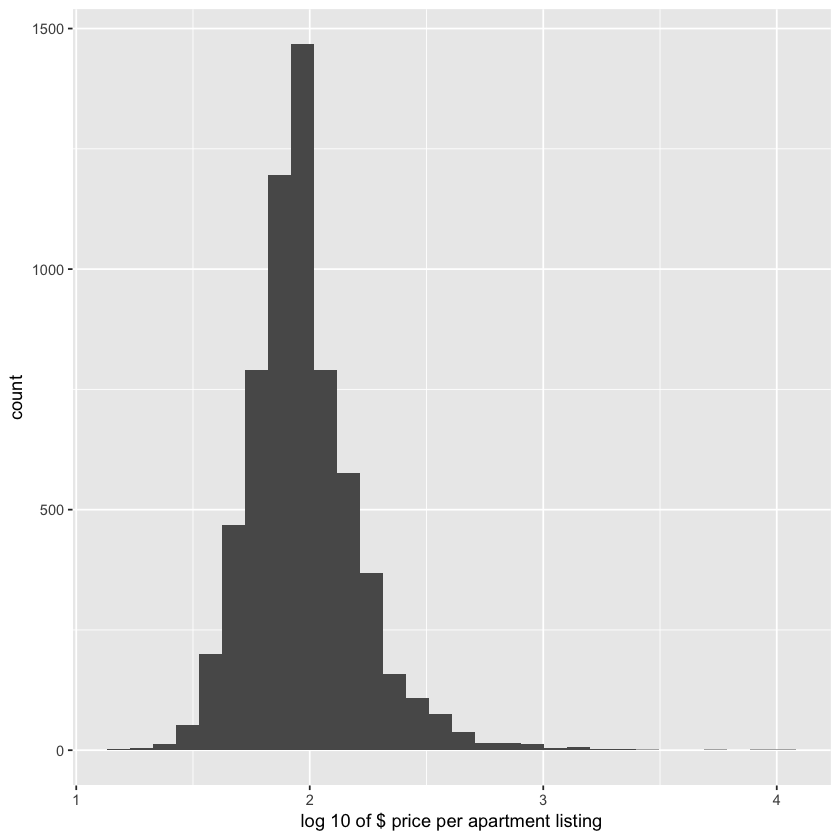

In [6]:
ggplot(subset(airbnb,room_type=='Entire home/apt'), aes(x=log10(price))) + geom_histogram() + xlab('log 10 of $ price per apartment listing')

In [52]:
no_airbnb = aggregate(price~neighbourhood,subset(airbnb,room_type=='Entire home/apt'),length)
med_airbnb = aggregate(price~neighbourhood,subset(airbnb,room_type=='Entire home/apt'),median)
airbnb_ = merge(no_airbnb,med_airbnb,by="neighbourhood")
airbnb_ = subset(airbnb_,price.x>10) #more than 10 listings in a neighbourhood
nrow(airbnb_)
head(airbnb_)

[1] 19

,neighbourhood,price.x,price.y
1,Ahuntsic-Cartierville,119,75
2,Anjou,17,50
5,Côte-des-Neiges-Notre-Dame-de-Grâce,421,80
6,Côte-Saint-Luc,12,120
8,Dorval,13,110
12,Lachine,48,89


In [53]:
capital = merge(capital,airbnb_[c('neighbourhood','price.x','price.y')],by.x="nom_qr",by.y="neighbourhood")
nrow(capital)
head(capital)

[1] 14

nom_qr,sp_cap,cult_cap,soc_cap,decpoor,incrich,Dif,Sum,gent,price.x,price.y
Ahuntsic-Cartierville,2.56,0.06754306,0.4947619,3,4,1,7,4,119,75.0
Anjou,1.41,0.01004806,0.5207143,3,2,-1,5,3,17,50.0
Côte-des-Neiges-Notre-Dame-de-Grâce,2.67,0.02524947,0.4669718,2,3,1,5,3,421,80.0
Lachine,2.48,0.01174497,0.6761538,0,4,4,4,3,48,89.0
LaSalle,1.86,0.02995433,0.4600000,1,2,1,3,2,30,72.5
Le Plateau-Mont-Royal,2.46,0.03896260,0.4722707,2,5,3,7,4,1759,92.0


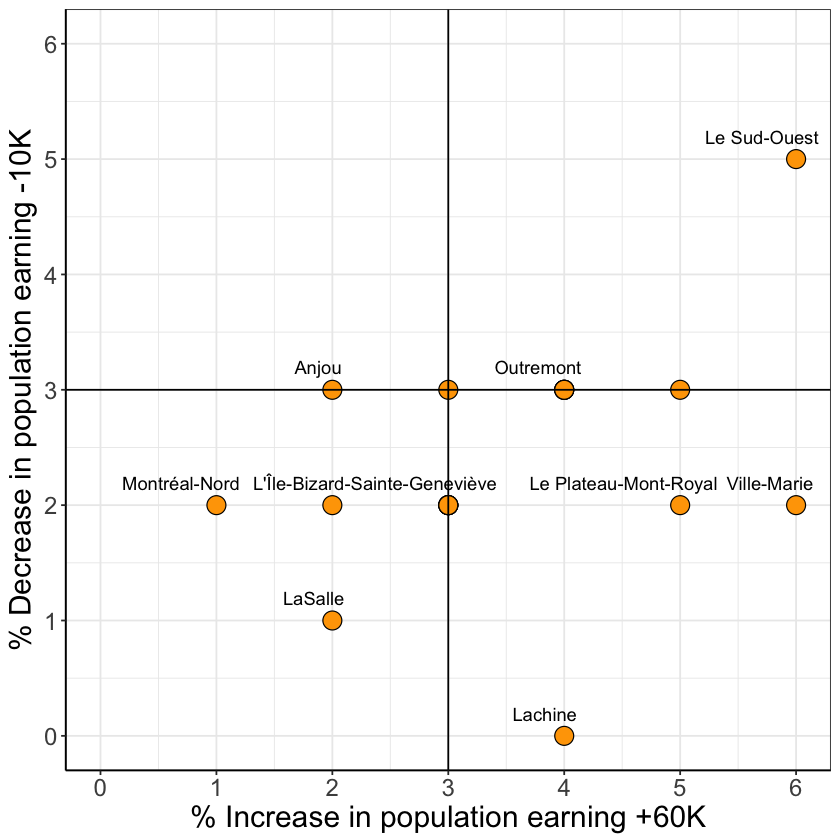

In [49]:
ggplot(capital, aes(x=incrich,decpoor)) + 
geom_point(size=5, fill="orange",colour="black",pch=21) + 
geom_text(aes(label=nom_qr, vjust=-1.2, hjust=0.8),check_overlap = TRUE) +
theme_bw() + theme(text = element_text(size=18), legend.position='', 
          axis.line = element_line(colour = "black")) +
scale_x_continuous(breaks=seq(0,6,1),limits=c(0,6)) +
scale_y_continuous(breaks=seq(0,6,1),limits=c(0,6)) +
geom_hline(yintercept = 3) +
geom_vline(xintercept = 3) +
xlab("% Increase in population earning +60K") +
ylab("% Decrease in population earning -10K")
#ggsave('../output/disp_perc.pdf')

In [54]:
#normalise values by standard score
capital[2:11] = scale(capital[2:11],scale=TRUE,center=TRUE)

In [26]:
cor(capital[2:11])

,sp_cap,cult_cap,soc_cap,decpoor,incrich,Dif,Sum,gent,price.x,price.y
sp_cap,1.00000000,0.33451067,0.06934751,0.08168100,0.65059376,0.54362549,0.45475037,0.48849509,0.40410328,0.69047426
cult_cap,0.33451067,1.00000000,0.09146909,-0.14637876,0.03235082,0.15658894,-0.06348314,-0.04626479,0.27482594,0.01078199
soc_cap,0.06934751,0.09146909,1.00000000,-0.40143091,0.10619718,0.44592540,-0.16313608,-0.08969756,-0.16865538,0.01370822
decpoor,0.08168100,-0.14637876,-0.40143091,1.00000000,0.38895971,-0.49412312,0.81621805,0.66583202,-0.04017361,0.08700608
incrich,0.65059376,0.03235082,0.10619718,0.38895971,1.00000000,0.60873748,0.84972532,0.89116312,0.62035174,0.78666053
Dif,0.54362549,0.15658894,0.44592540,-0.49412312,0.60873748,1.00000000,0.09897374,0.26758910,0.62002545,0.66744638
Sum,0.45475037,-0.06348314,-0.16313608,0.81621805,0.84972532,0.09897374,1.00000000,0.93992223,0.36604849,0.54312904
gent,0.48849509,-0.04626479,-0.08969756,0.66583202,0.89116312,0.26758910,0.93992223,1.00000000,0.46611497,0.58781095
price.x,0.40410328,0.27482594,-0.16865538,-0.04017361,0.62035174,0.62002545,0.36604849,0.46611497,1.00000000,0.46929715
price.y,0.69047426,0.01078199,0.01370822,0.08700608,0.78666053,0.66744638,0.54312904,0.58781095,0.46929715,1.00000000


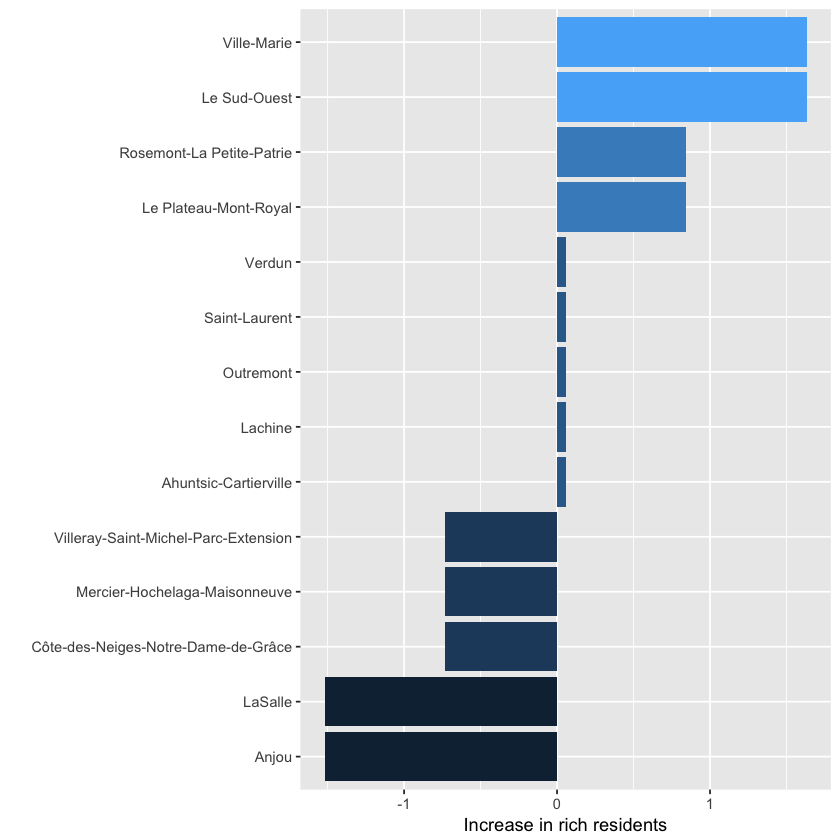

In [27]:
capital = transform(capital,nom_qr = reorder(nom_qr, incrich))
ggplot(capital,aes(y=incrich,x=nom_qr,fill=incrich)) + geom_col() + coord_flip() + xlab('') + ylab('Increase in rich residents') +
theme(legend.position='') 
#ggsave('../output/incrich.pdf',height=6,width=6)

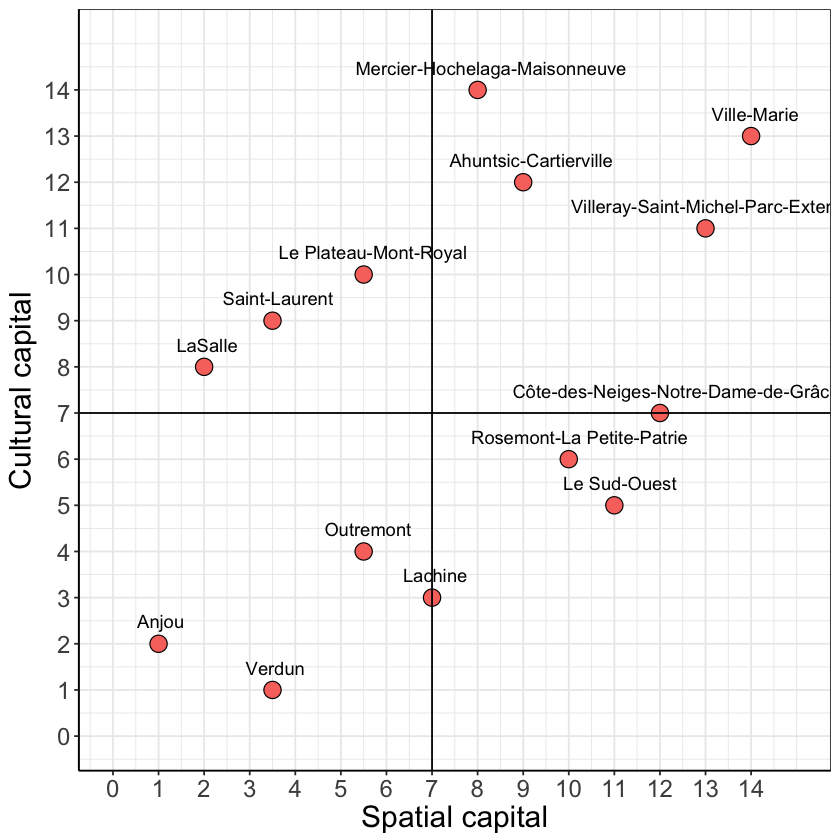

In [34]:
ggplot(capital, aes(x=rank(sp_cap), y=rank(cult_cap))) + 
geom_point(aes(size=5, fill="pink"),colour="black",pch=21)+ 
geom_text(aes(label=nom_qr, vjust=-1.2, hjust=0.45),check_overlap = TRUE)+
scale_x_continuous(breaks=seq(0,14,1),limits=c(0,15)) +
scale_y_continuous(breaks=seq(0,14,1),limits=c(0,15)) +
geom_hline(yintercept = 7) +
geom_vline(xintercept = 7) +
theme_bw() + theme(text = element_text(size=18), legend.position='', 
          axis.line = element_line(colour = "black")) + 
xlab('Spatial capital') + ylab('Cultural capital') 
#ggsave('../output/cult_sp.pdf')

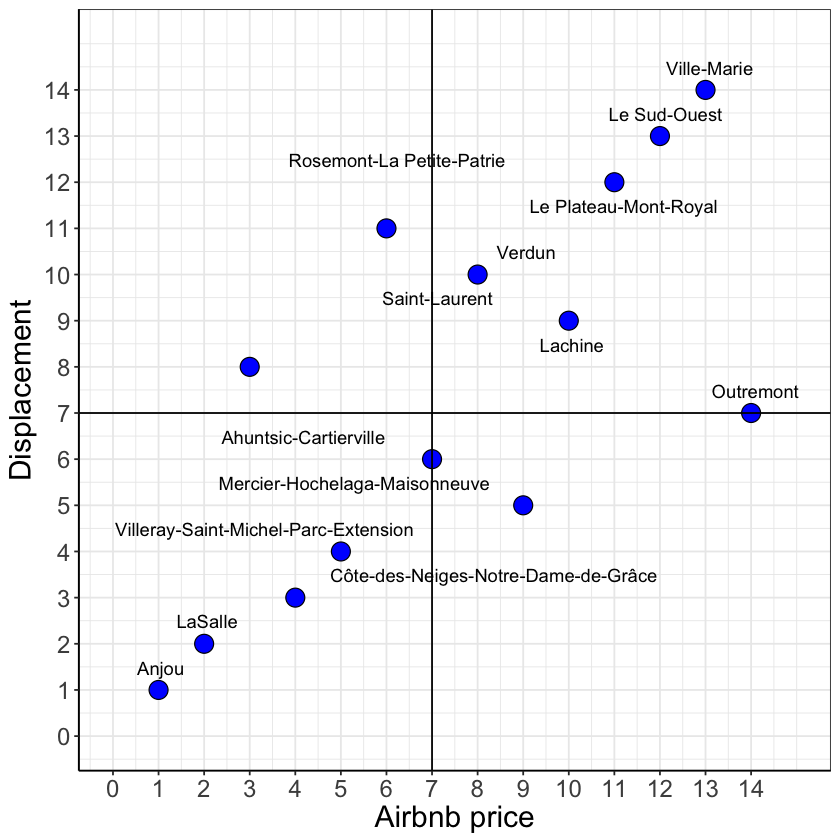

In [35]:
ggplot(capital, aes(x=rank(price.y,ties.method ="random"), y=rank(incrich,ties.method ="random"))) + 
geom_point(size=5, fill="blue",colour="black",pch=21)+ 
geom_text(aes(label=nom_qr, vjust=-1.2, hjust=0.45),check_overlap = TRUE)+
theme_bw() + theme(text = element_text(size=18), legend.position='', 
          axis.line = element_line(colour = "black")) + 
scale_x_continuous(breaks=seq(0,14,1),limits=c(0,15)) +
scale_y_continuous(breaks=seq(0,14,1),limits=c(0,15)) +
geom_hline(yintercept = 7) +
geom_vline(xintercept = 7) +
xlab('Airbnb price') + ylab('Displacement') 
#ggsave('../output/price_disp.pdf')

In [38]:
model = as.data.frame(cbind(predict(lm(data=capital,price.y~sp_cap+cult_cap+soc_cap+incrich)),capital$price.y))
model = cbind(model,capital$nom_qr)
names(model) = c('predicted','actual','nom_qr')

In [39]:
summary(lm(data=capital,price.y~sp_cap+incrich))


Call:
lm(formula = price.y ~ sp_cap + incrich, data = capital)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85683 -0.31046 -0.06237  0.23451  1.29380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3.972e-16  1.658e-01   0.000   1.0000  
sp_cap       3.098e-01  2.266e-01   1.367   0.1989  
incrich      5.851e-01  2.266e-01   2.582   0.0255 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6205 on 11 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.615 
F-statistic: 11.38 on 2 and 11 DF,  p-value: 0.002096


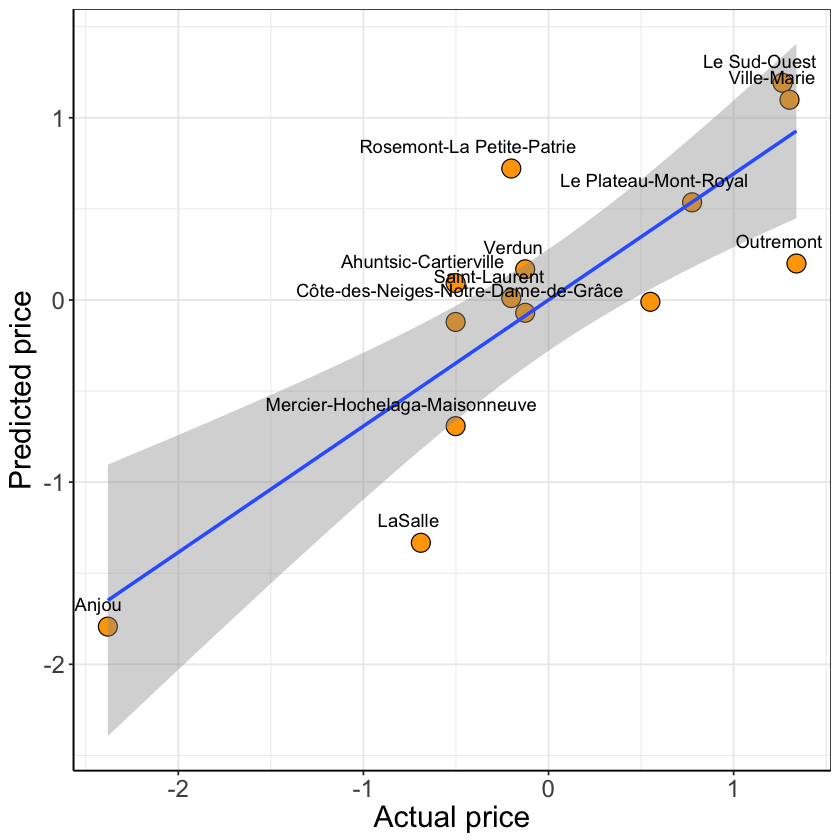

In [41]:
ggplot(model,aes(y=predicted,x=actual)) + 
geom_point(size=5, fill="orange",colour="black",pch=21)+ 
geom_smooth(method=lm)+
geom_text(aes(label=nom_qr, vjust=-1.2, hjust=0.7),check_overlap = TRUE)+
theme_bw() + theme(text = element_text(size=18), legend.position='', 
          axis.line = element_line(colour = "black")) + 
xlab('Actual price') + ylab('Predicted price') 
#ggsave("../output/model.pdf")

In [55]:
names(capital) = c('NOM','sp_cap','cult_cap','soc_cap','decpoor','incrich','diff','sum','gent','listings','price')

In [56]:
capital$sp_rank = rank(capital$sp_cap)
capital$cult_rank = rank(capital$cult_cap)
capital$soc_rank = rank(capital$soc_cap)
capital$price_rank = rank(capital$price)
capital$rich_rank = rank(capital$incrich)

In [57]:
head(capital)

NOM,sp_cap,cult_cap,soc_cap,decpoor,incrich,diff,sum,gent,listings,price,sp_rank,cult_rank,soc_rank,price_rank,rich_rank
Ahuntsic-Cartierville,0.30737154,0.58661811,-0.3427197,0.4935177,0.05629552,-0.3718842,0.3177401,0.2672612,-0.5669264,-0.5018500,9.0,12,5,4.0,8.0
Anjou,-2.76634386,-0.78284395,0.1218874,0.4935177,-1.51997909,-1.8594211,-0.6707847,-0.6681531,-0.7455608,-2.3804330,1.0,2,10,1.0,1.5
Côte-des-Neiges-Notre-Dame-de-Grâce,0.60137910,-0.42076459,-0.8402256,-0.3701383,-0.73184178,-0.3718842,-0.6707847,-0.6681531,-0.0380286,-0.1261334,12.0,7,3,8.5,4.0
Lachine,0.09354786,-0.74242559,2.9046114,-2.0974502,0.05629552,1.8594211,-1.1650470,-0.6681531,-0.6912699,0.5501565,7.0,3,14,10.0,8.0
LaSalle,-1.56358566,-0.30870047,-0.9650373,-1.2337942,-1.51997909,-0.3718842,-1.6593094,-1.6035675,-0.7227936,-0.6897083,2.0,8,2,2.0,1.5
Le Plateau-Mont-Royal,0.04009194,-0.09413423,-0.7453630,-0.3701383,0.84443283,1.1156527,0.3177401,0.2672612,2.3052339,0.7755864,5.5,10,4,11.0,11.5


In [65]:
#read administrative boundries shape file
areas = readOGR("../data/arrondisments-shp", "LIMADMIN")
areas = spTransform(areas, CRS("+proj=longlat +datum=WGS84"))

OGR data source with driver: ESRI Shapefile 
Source: "../data/arrondisments-shp", layer: "LIMADMIN"
with 34 features
It has 9 fields


In [67]:
#merge data and map
areas@data$id = rownames(areas@data)
areas@data = merge(areas@data, capital, by="NOM")
map = fortify(areas)
map = join(map,areas@data, by="id")

Regions defined for each Polygons


In [68]:
head(map)

long,lat,order,hole,piece,id,group,NOM,MUNID,CODEID,⋯,diff,sum,gent,listings,price,sp_rank,cult_rank,soc_rank,price_rank,rich_rank
-73.62078,45.52365,1,FALSE,1,0,0.1,Outremont,66023,11,⋯,-0.3718842,0.3177401,0.2672612,-0.5686777,1.339161,5.5,4,1,14,8
-73.62020,45.52430,2,FALSE,1,0,0.1,Outremont,66023,11,⋯,-0.3718842,0.3177401,0.2672612,-0.5686777,1.339161,5.5,4,1,14,8
-73.62012,45.52438,3,FALSE,1,0,0.1,Outremont,66023,11,⋯,-0.3718842,0.3177401,0.2672612,-0.5686777,1.339161,5.5,4,1,14,8
-73.61995,45.52456,4,FALSE,1,0,0.1,Outremont,66023,11,⋯,-0.3718842,0.3177401,0.2672612,-0.5686777,1.339161,5.5,4,1,14,8
-73.61993,45.52458,5,FALSE,1,0,0.1,Outremont,66023,11,⋯,-0.3718842,0.3177401,0.2672612,-0.5686777,1.339161,5.5,4,1,14,8
-73.61979,45.52477,6,FALSE,1,0,0.1,Outremont,66023,11,⋯,-0.3718842,0.3177401,0.2672612,-0.5686777,1.339161,5.5,4,1,14,8


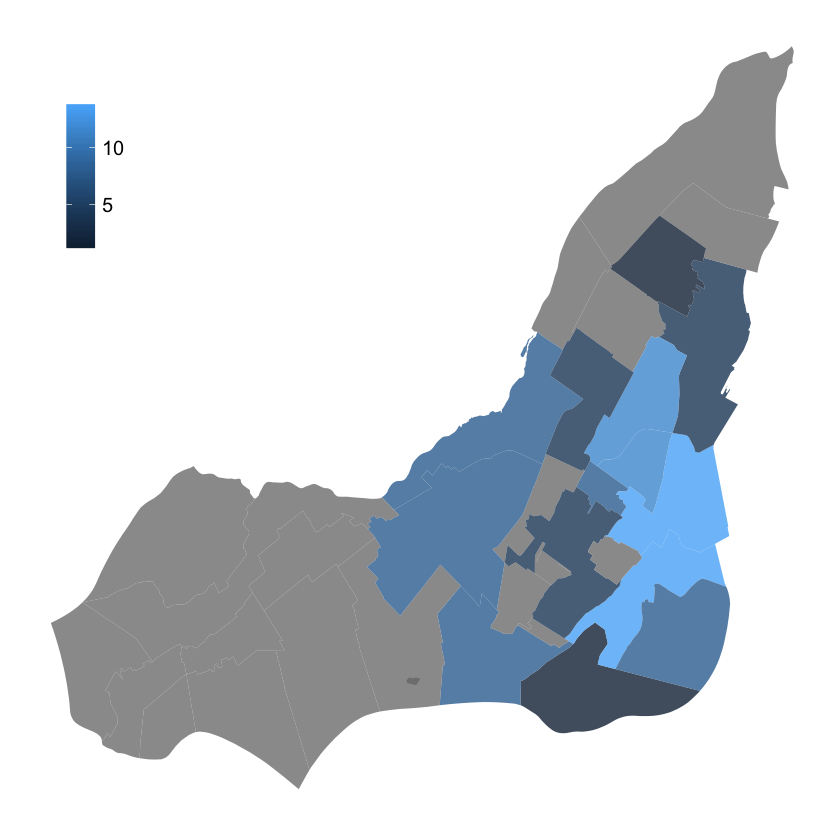

In [69]:
ggplot(map,aes(x=long, y=lat, group=group))+ 
geom_polygon(aes(fill=rich_rank),alpha=0.8) +
theme(line = element_blank(),
        axis.text =element_blank(),
        legend.text = element_text(size=12),
        panel.background = element_rect(fill="white"),
        title = element_blank(), legend.position=c(.1,.8))
#ggsave('../output/map_rich_rank.pdf')

In [70]:
venues = read.csv('../data/venues.csv')
venues = subset(venues,top_cat!='')
nrow(venues)
head(venues)

[1] 7781

,venue_id,lat,lon,cat,top_cat,name,users,checkins
1,4b527439f964a5200a7e27e3,45.50800,-73.55953,Vietnamese,Food,Pho Cali,167,274
2,4bc47682461576b0d3e87f32,45.54171,-73.67540,Grocery Store,Shops & Services,Loblaws,81,282
3,4c005c70379020a12b64467f,45.52562,-73.62887,Greek,Food,Elatos Souvlaki,7,9
5,4c5d87697f661b8d68814b1c,45.50271,-73.55389,French,Food,L'Arrivage,62,121
6,4cf9057201568cfa90bc23e7,45.54098,-73.61387,Arts & Crafts,Shops & Services,Ultra Text Inc,3,9
7,4c0a744ba1b32d7fa04c99f0,45.71529,-73.51122,Apparel,Shops & Services,Mexx,16,21


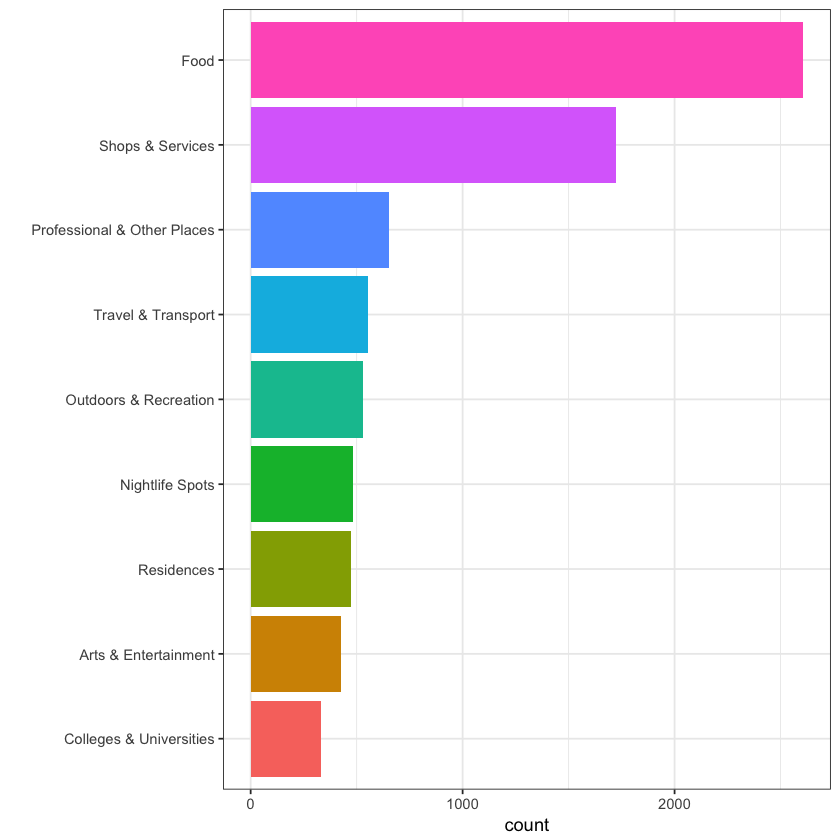

In [71]:
venue_cats = aggregate(venue_id~top_cat,venues,length)
venue_cats = transform(venue_cats,top_cat = reorder(top_cat, venue_id))
ggplot(venue_cats,aes(x=top_cat,y=venue_id, fill=top_cat)) + geom_bar(stat="identity") + 
coord_flip() + theme_bw() + theme(legend.position='') + xlab('') + ylab("count")
#ggsave('../output/cats.png')

In [72]:
Montreal = get_map("Montreal,Canada", zoom=11, color="bw")

Source : https://maps.googleapis.com/maps/api/staticmap?center=Montreal,Canada&zoom=11&size=640x640&scale=2&maptype=terrain&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Montreal%2CCanada


Warning message:
“Removed 754 rows containing missing values (geom_point).”

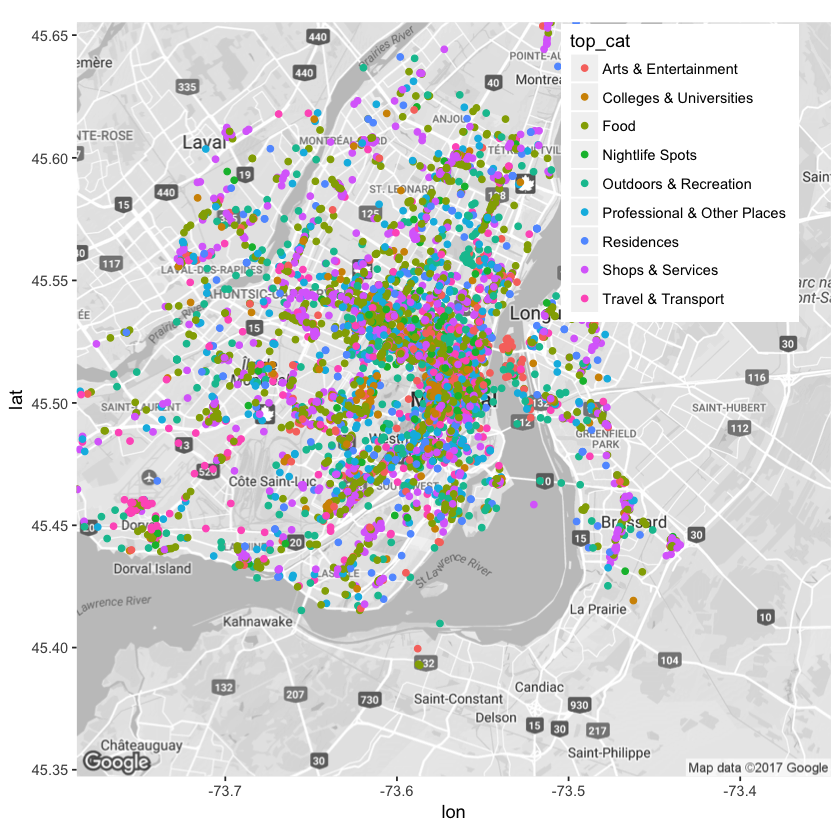

In [73]:
ggmap(Montreal) +
geom_point(data=venues, aes(x=lon, y=lat, color=top_cat)) + theme(legend.position=c(0.8,0.8)) 
#ggsave('../output/4sq.png')